In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.model_selection import train_test_split
%matplotlib inline
import statsmodels.api as sm


In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
#determine majority class
y_train = df.target
y_train.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [5]:
#Majority class for every prediction

majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)
print(len(y_pred))

303


In [6]:
# Accuracy of majority class baseline = 
#frequency of majority class
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)    

0.5445544554455446

# Train/Validat/Test Split

In [7]:
X_train = df.drop('target', axis=1)
y_train = df.target

X_train.shape, y_train.shape

((303, 13), (303,))

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.80, random_state=42, )

X_train.shape, X_val.shape, y_train.shape, y_val.shape

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((242, 13), (61, 13), (242,), (61,))

In [9]:
y_train.value_counts(normalize=True)

1    0.549587
0    0.450413
Name: target, dtype: float64

In [10]:
y_val.value_counts(normalize=True)

1    0.52459
0    0.47541
Name: target, dtype: float64

In [11]:
#Begin with baseline: fast, first models
X_train_num = X_train.select_dtypes('number')
X_val_num = X_val.select_dtypes('number')

In [12]:
 X_train_num.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [13]:
# Fit logistic Regression on trai data
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV(n_jobs=-1)

model.fit(X_train_num, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=-1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [14]:
y_pred = model.predict(X_val_num)
accuracy_score(y_val, y_pred)

0.8688524590163934

In [15]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [16]:
y_pred_prob = model.predict_proba(X_val_num)
y_pred_prob

array([[0.91718075, 0.08281925],
       [0.24399618, 0.75600382],
       [0.15474074, 0.84525926],
       [0.94721257, 0.05278743],
       [0.0958871 , 0.9041129 ],
       [0.10145698, 0.89854302],
       [0.44546624, 0.55453376],
       [0.99589874, 0.00410126],
       [0.99068834, 0.00931166],
       [0.50678639, 0.49321361],
       [0.31376236, 0.68623764],
       [0.87612942, 0.12387058],
       [0.10499386, 0.89500614],
       [0.96385716, 0.03614284],
       [0.02465185, 0.97534815],
       [0.06918942, 0.93081058],
       [0.02620327, 0.97379673],
       [0.92164942, 0.07835058],
       [0.98716307, 0.01283693],
       [0.97997464, 0.02002536],
       [0.27669803, 0.72330197],
       [0.98489439, 0.01510561],
       [0.89205054, 0.10794946],
       [0.19931863, 0.80068137],
       [0.10264677, 0.89735323],
       [0.30157395, 0.69842605],
       [0.16358865, 0.83641135],
       [0.35053159, 0.64946841],
       [0.98612855, 0.01387145],
       [0.11516732, 0.88483268],
       [0.

In [17]:
pd.Series(y_pred).value_counts(normalize=True)

1    0.52459
0    0.47541
dtype: float64

In [18]:

X_train.describe(include='number')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,54.462810,0.657025,0.991736,130.359504,246.842975,0.128099,0.553719,150.115702,0.314050,1.013223,1.421488,0.681818,2.301653
std,9.204492,0.475687,1.022533,16.828858,52.795465,0.334893,0.530410,22.352398,0.465098,1.102577,0.607724,0.990620,0.593811
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.500000,1.000000,1.000000,130.000000,239.500000,0.000000,1.000000,154.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,165.750000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000


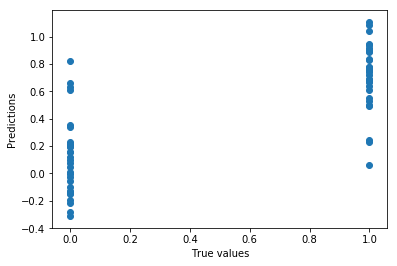

In [19]:
from sklearn.linear_model import LinearRegression as lm
model = lm().fit(X_train, y_train)
predictions = model.predict(X_val_num)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.scatter(y_val, predictions);
plt.show();

In [20]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


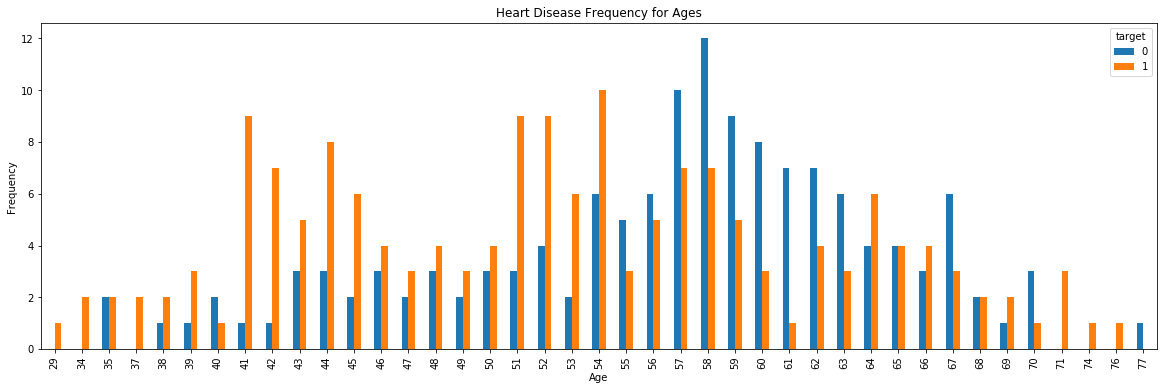

In [21]:
pd.crosstab(df.age,df.target).plot.bar( figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [22]:
X_train_num.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

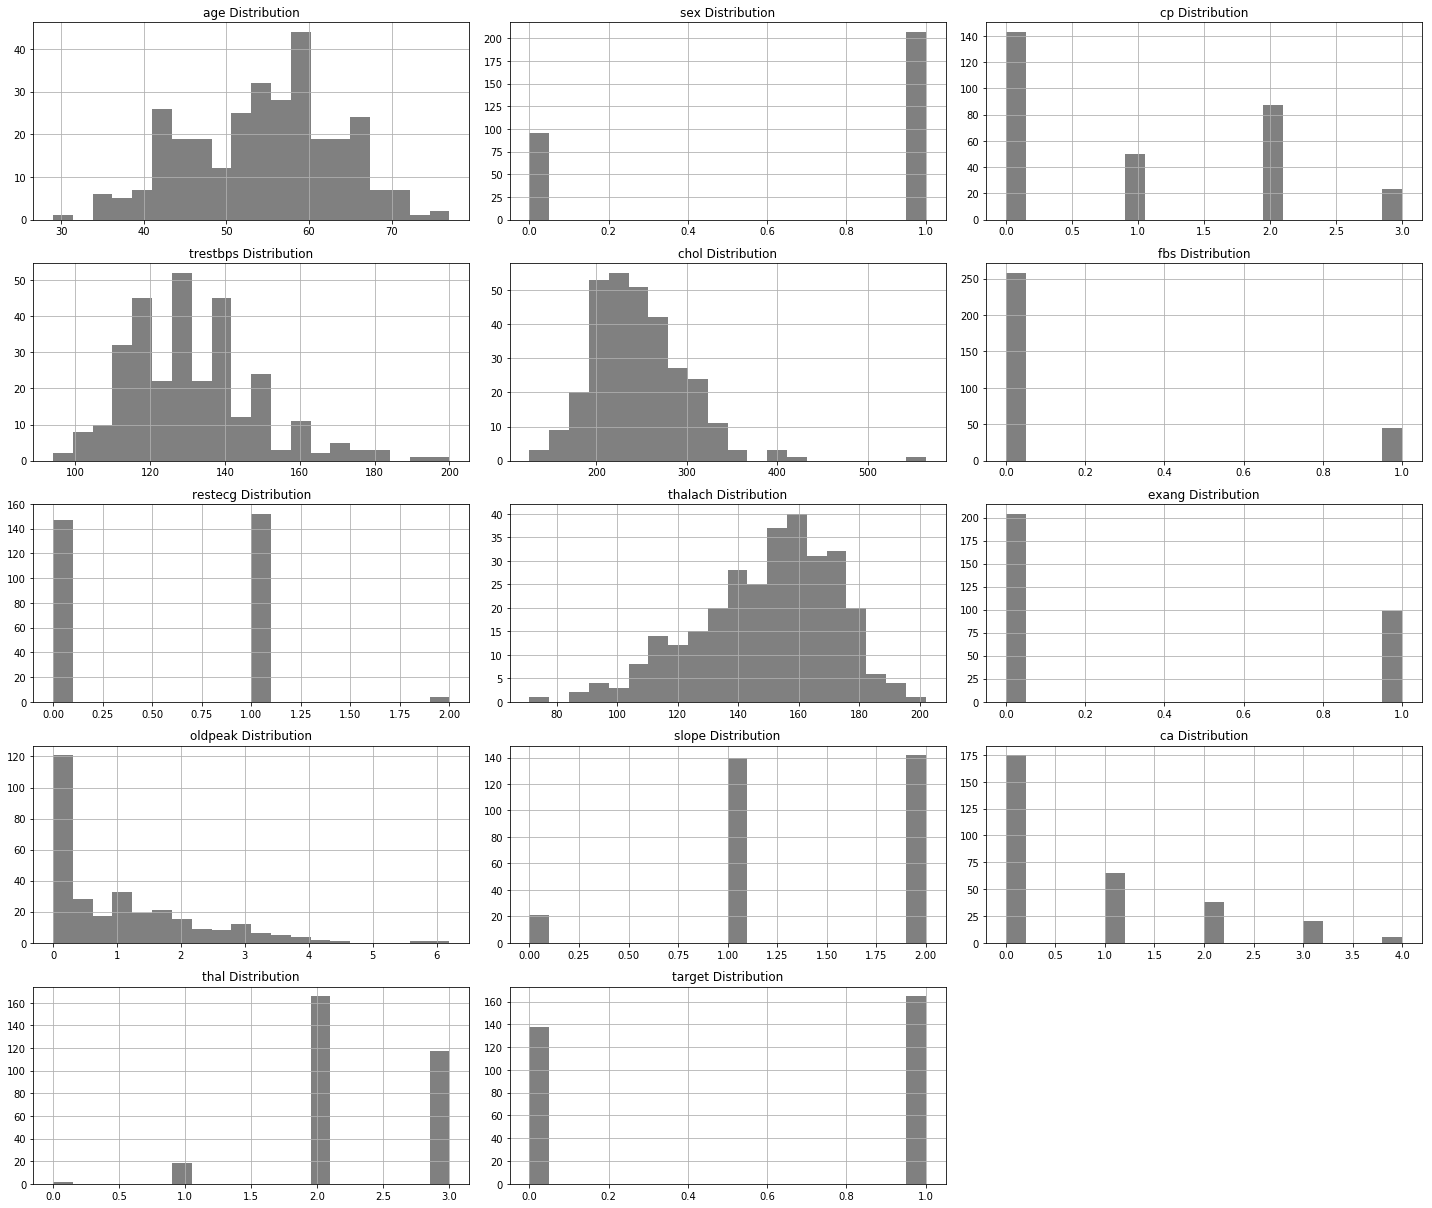

In [23]:
def histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='grey')
        ax.set_title(feature+" Distribution",color='black')
        
    fig.tight_layout()  
    plt.show()
histograms(df,df.columns,6,3)

In [24]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

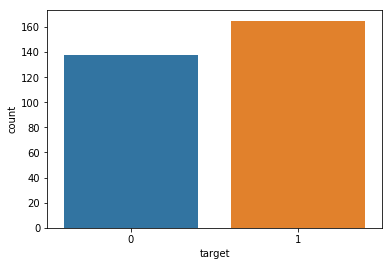

In [25]:
sns.countplot(x='target', data=df);

In [26]:
from statsmodels.tools import add_constant as add_constant
target_const = add_constant(df)
target_const.head()

,const,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1.0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1.0,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,1.0,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,1.0,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,1.0,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=target_const.columns[:-1]
model=sm.Logit(df.target, target_const[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.348904
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                           13
Date:                Fri, 27 Sep 2019   Pseudo R-squ.:                  0.4937
Time:                        09:41:45   Log-Likelihood:                -105.72
converged:                       True   LL-Null:                       -208.82
                                        LLR p-value:                 7.262e-37
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4505      2.571      1.342      0.180      -1.590       8.490
age           -0.0049      0.023     -0.212      0.832      -0.050       0.041
sex           -1.7582      0.469     -3.751      0.000      -2.677      -0.839
cp             0.8599      0.185      4.638      0.000       0.496       1.223
trestbps      -0.0195      0.010     -1.884      0.060      -0.040       0.001
chol          -0.0046      0.004     -1.224      0.221      -0.012       0.003
fbs            0.0349      0.529      0.066      0.947      -1.003       1.073
restecg        0.4663      0.348      1.339      0.181      -0.216       1.149
thalach        0.0232      0.010      2.219      0.026       0.003       0.044
exang         -0.9800      0.410     -2.391      0.017      -1.783      -0.177
oldpeak       -0.5403      0.214     -2.526      0.012      -0.959      -0.121
slope          0.5793      0.350      1.656      0.098      -0.106       1.265
ca            -0.7733      0.191     -4.051      0.000      -1.147      -0.399
thal          -0.9004      0.290     -3.104      0.002      -1.469      -0.332
==============================================================================
"""

In [30]:
def feature_sel (data_frame,dep_var,col_list):
        while len(col_list)>0 :
            model=sm.Logit(dep_var,data_frame[col_list])
            result=model.fit(disp=0)
            largest_pvalue=round(result.pvalues,3).nlargest(1)
            if largest_pvalue[0]<(0.05):
                return result
                break
            else:
                col_list=col_list.drop(largest_pvalue.index)

result=feature_sel(target_const, df.target, cols)

In [32]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Fri, 27 Sep 2019   Pseudo R-squ.:                  0.4651
Time:                        09:42:34   Log-Likelihood:                -111.71
converged:                       True   LL-Null:                       -208.82
                                        LLR p-value:                 3.209e-39
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -1.3898      0.405     -3.431      0.001      -2.184      -0.596
cp             0.7861      0.174      4.509      0.000       0.444       1.128
thalach        0.0261      0.004      5.905      0.000       0.017       0.035
exang         -1.0130      0.376     -2.695      0.007      -1.750      -0.276
oldpeak       -0.7262      0.176     -4.130      0.000      -1.071      -0.382
ca            -0.7053      0.173     -4.087      0.000      -1.043      -0.367
thal          -0.8674      0.259     -3.351      0.001      -1.375      -0.360
==============================================================================
"""

In [33]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

         CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
sex          0.112623       0.551073    0.249126   0.001
cp           1.559575       3.088655    2.194764   0.000
thalach      1.017567       1.035326    1.026408   0.000
exang        0.173839       0.758508    0.363123   0.007
oldpeak      0.342750       0.682775    0.483757   0.000
ca           0.352232       0.692750    0.493973   0.000
thal         0.252918       0.697612    0.420046   0.001


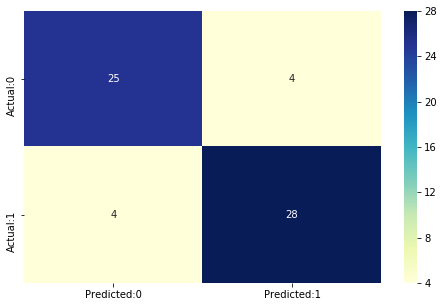

In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_val,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [35]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [36]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8688524590163934 
 The Missclassification = 1-Accuracy =  0.1311475409836066 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.875 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.8620689655172413 
 Positive Predictive value = TP/(TP+FP) =  0.875 
 Negative predictive Value = TN/(TN+FN) =  0.8620689655172413 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  6.343749999999997 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.14500000000000002


In [37]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(X_train,y_train)
y_pred=logr.predict(X_val)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
y_pred_prob=logr.predict_proba(X_val_num)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.922471,0.077529
1,0.261241,0.738759
2,0.144341,0.855659
3,0.971653,0.028347
4,0.060461,0.939539


In [39]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logr.predict_proba(X_val_num)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_val,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')
    

With 0.1 threshold the Confusion Matrix is  
 [[23  6]
 [ 3 29]] 
 with 52 correct predictions and 3 Type II errors( False Negatives) 

 Sensitivity:  0.90625 Specificity:  0.7931034482758621 



With 0.2 threshold the Confusion Matrix is  
 [[24  5]
 [ 3 29]] 
 with 53 correct predictions and 3 Type II errors( False Negatives) 

 Sensitivity:  0.90625 Specificity:  0.8275862068965517 



With 0.3 threshold the Confusion Matrix is  
 [[25  4]
 [ 3 29]] 
 with 54 correct predictions and 3 Type II errors( False Negatives) 

 Sensitivity:  0.90625 Specificity:  0.8620689655172413 



With 0.4 threshold the Confusion Matrix is  
 [[25  4]
 [ 3 29]] 
 with 54 correct predictions and 3 Type II errors( False Negatives) 

 Sensitivity:  0.90625 Specificity:  0.8620689655172413 





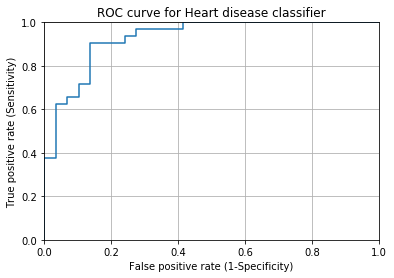

In [40]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [41]:
import sklearn

In [42]:
sklearn.metrics.roc_auc_score(y_val,y_pred_prob_yes[:,1])

0.927801724137931